<a href="https://colab.research.google.com/github/deepikaaap/image_crop_association/blob/master/crop_image_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib
import os
from google_drive_downloader import GoogleDriveDownloader as gdd

In [0]:
mkdir true_images

In [0]:
mkdir cropped_images

In [4]:
gdd.download_file_from_google_drive(file_id='0B2LekbGJrFsIQklqYWZyLXdMOFRucURpQmVhWTdoMThBVEk0',
                                    dest_path='./imageurl.txt')
gdd.download_file_from_google_drive(file_id='0B2LekbGJrFsIVmoxNGRrMmxwdFRnTTJIZGd6VEdXUlZxdktr',
                                    dest_path='./croppedimageurl.txt')

In [0]:
my_path = '/content/true_images/'
cropped_path = '/content/cropped_images/'

In [0]:
f = open("imageurl.txt", "r")
for x in f:
  urllib.request.urlretrieve(x, os.path.join(my_path, os.path.basename(x.strip())))


In [0]:
f = open("croppedimageurl.txt", "r")
for x in f:
  urllib.request.urlretrieve(x, os.path.join(cropped_path, os.path.basename(x.strip())))


In [0]:
true_images = os.listdir(my_path)
cropped_images =  os.listdir(cropped_path)

0.9997145533561707
[49, 10, 904, 1208]
97cef219-256f-4c55-b788-877ddb843933.jpg
de27f272-0ab8-46e4-af30-a6f3d6066d3c.jpg


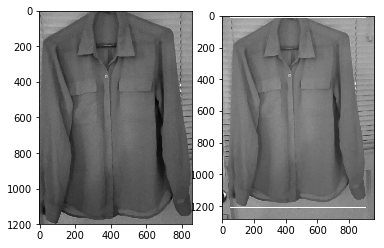

0.9996299147605896
[150, 87, 196, 125]
beee6dbf-6a90-4088-9705-a74781552dfc.jpg
9d39e971-052f-4dec-b707-bc179f2fedf7.jpg


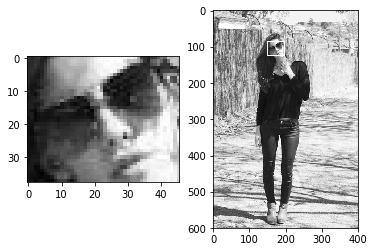

0.9979175329208374
[174, 480, 190, 514]
1ea5a269-1764-4bba-b7ca-fec525e935cd.jpg
57765bb2-bd36-4b11-854a-7c319d87659e.jpg


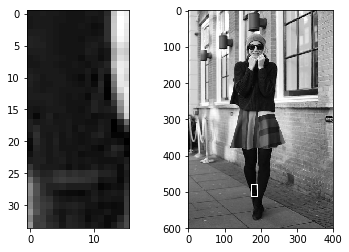

0.9997634291648865
[120, 217, 1177, 816]
541f0185-1d44-4497-9883-0004ad438920.jpg
962d1e3c-fd92-41c0-9cc2-b9ba613a4746.jpg


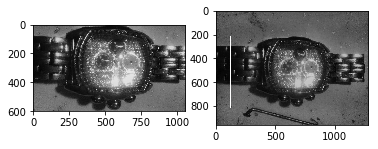

TypeError: ignored

In [61]:
def load_image(img_id, cropped= False):
  if cropped:
    image = cv2.imread(os.path.join(cropped_path,img_id),0)
  else:
    image = cv2.imread(os.path.join(my_path, img_id),0)
    
  return image


association_map = {}
# association_map['na'] = []

for image_id in true_images[:10]:
  association_map[image_id] = []
  img = load_image(image_id, cropped= False)
  for cropped_id in cropped_images:
    image = img.copy()
    template = load_image(cropped_id, cropped= True)
    if template.shape[0] > image.shape[0]:
      template = cv2.resize(template, ( template.shape[1], image.shape[0]))
    elif template.shape[1] > image.shape[1]:
      template = cv2.resize(template, (image.shape[1], template.shape[0]))
    w, h = template.shape[::-1]
    method = eval('cv2.TM_CCOEFF_NORMED')

    # Applying template Matching
    res = cv2.matchTemplate(image,template,method)
    threshold = 0.95
    loc = np.where( res >= threshold)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    for pt in zip(*loc[::-1]):
      top_left = pt
      bottom_right = (pt[0] + w, pt[1] + h)
      
    if max_val > threshold:
      print(max_val)
      position = list(top_left)
      position.extend(list(bottom_right))
      print(position)
      print(image_id)
      print(cropped_id)
      association_map[image_id].append(tuple([cropped_id, position]))
      cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), 2)

      plt.subplot(122),plt.imshow(image,cmap = 'gray')
      plt.subplot(121),plt.imshow(template,cmap = 'gray')

      plt.show()
      
available_crops = np.asarray([values for values in association_map.values()]).flatten()
association_map['na'] = [(x, []) for x in list(set(cropped_images) - set(available_crops))]
  
print(association_map)